In [3]:
# 1-1. 데이터 가져오기 

import pandas as pd 
import matplotlib.pyplot as plt 


socar = pd.read_csv('../../0. raw_data/insurance_fraud_detect_data.csv')
socar 

fraud_YN  car_model  sharing_type  age_group  has_previous_accident  \
0             0          2             1          3                      0   
1             0          1             0          4                      0   
2             0          1             0          4                      1   
3             0          3             1          3                      0   
4             0          1             0          1                      0   
...         ...        ...           ...        ...                    ...   
15995         0          2             0          2                      0   
15996         0          2             0          2                      1   
15997         0          2             1          2                      0   
15998         0          2             0          2                      0   
15999         0          2             0          2                      0   

       cumulative_use_count  b2b  accident_ratio  pf_type  socarpass  ...  \
0                         2    0             100        2          0  ...   
1                         4    0               0        3          1  ...   
2                         4    0             100        3          1  ...   
3                         4    0               0        2          0  ...   
4                         1    0             100        1          0  ...   
...                     ...  ...             ...      ...        ...  ...   
15995                     2    0             100        2          0  ...   
15996                     4    0             100        1          1  ...   
15997                     4    0             100        1          0  ...   
15998                     2    0             100        2          0  ...   
15999                     1    0             100        1          0  ...   

       insure_cost  accident_location  car_part1  car_part2  repair_cnt  \
0                0                  1          0          0           1   
1                0                  1          1          1           2   
2         12925040                  3          1          0           2   
3                0                  3          1          0           1   
4          1209410                  1          0          0           2   
...            ...                ...        ...        ...         ...   
15995            0                  1          1          0           1   
15996            0                  2          1          0           1   
15997            0                  0          0          0           1   
15998            0                  4          1          0           1   
15999      1188750                  2          0          0           1   

       acc_type1  insurance_site_aid_YN  police_site_aid_YN  total_prsn_cnt  \
0              0                      0                   0              -1   
1              1                      1                   1               0   
2              1                      1                   1               0   
3              0                      0                   0              -1   
4              0                      0                   0              -1   
...          ...                    ...                 ...             ...   
15995          0                      0                   0              -1   
15996          0                      0                   0              -1   
15997          0                      0                   0              -1   
15998          0                      0                   0              -1   
15999          0                      0                   0              -1   

       test_set  
0             0  
1             1  
2             1  
3             0  
4             0  
...         ...  
15995         0  
15996         0  
15997         1  
15998         0  
15999         0  

[16000 rows x 25 columns]

In [4]:
# 테스트 셋 분리

df = socar[socar['test_set']==0]
df_test = socar[socar['test_set']==1]

In [5]:
# test_set 분리 
X_test = df_test.drop('fraud_YN', axis = 1)
y_test = df_test['fraud_YN']

In [6]:
# train-valid 분리 

from sklearn.model_selection import train_test_split

y_target = df['fraud_YN']
X_features = df.drop('fraud_YN', axis = 1)

X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size = 0.2, random_state = 13, stratify = y_target)

# 비율 확인 
print(y_train.value_counts()/y_train.shape[0]*100) 
print(y_valid.value_counts()/y_valid.shape[0]*100)

0    99.73794
1     0.26206
Name: fraud_YN, dtype: float64
0    99.728261
1     0.271739
Name: fraud_YN, dtype: float64


In [7]:
# 학습 / 예측 / 평가 함수 

# 평가 함수 

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    # confusion = confusion_matrix(y_test, pred) #오차행렬
    accuracy = accuracy_score(y_test,pred) # 정확도 
    precision = precision_score(y_test,pred) # 정밀도
    recall = recall_score(y_test,pred) # 재현율 
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred)
    return accuracy, precision, recall, f1, roc_auc

# 성능 DF 반환 

def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

# 다수의 모델 성능 비교 

def get_result_df(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['Accuracy', 'precision', 'recall', 'f1', 'roc']
    tmp = []
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)


# 성능 확인 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC


# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
svm_clf = LinearSVC()


# 학습 진행 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,svm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']
results = get_result_df(models, model_names, X_train, y_train, X_valid, y_valid)
results 


C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is i

Accuracy  precision  recall   f1       roc
LogiReg       0.997283        0.0     0.0  0.0  0.500000
DecisionTree  0.997283        0.0     0.0  0.0  0.500000
RandomFore    0.997283        0.0     0.0  0.0  0.500000
LGBM          0.997283        0.0     0.0  0.0  0.500000
SVC           0.996506        0.0     0.0  0.0  0.499611

## Trial#1 
### 변수삭제	원핫인코딩	결측치처리	처리방안 	PCA	샘플링
### 삭제안함	적용안함	처리 안함	없음	2	SMOTE

In [8]:
df_1 = df.copy()

y_target = df_1['fraud_YN']
X_features = df_1.drop('fraud_YN', axis=1)

y_target = df_1['fraud_YN'].reset_index()
y_target = y_target.drop('index', axis=1)

In [78]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=2)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.tail()



component_1  component_2  target
12874  -574.604341    -1.387728       0
12875  -574.375247    -1.476862       0
12876  -574.788079    -1.382804       0
12877  -574.392880    -1.481290       0
12878  -575.759410     0.437704       0

In [79]:
print (np.sum(pca.explained_variance_ratio_))

0.9999986587449938


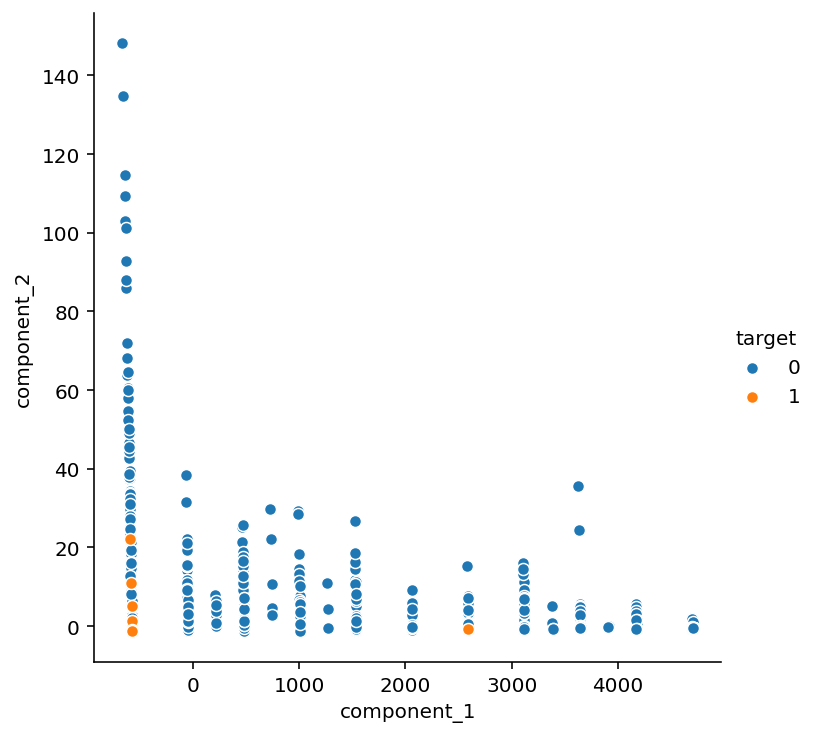

In [82]:
import seaborn as sns
sns.pairplot(DF_pca, hue='target', height=5, x_vars=['component_1'], y_vars=['component_2'])

In [10]:
y_target = DF_pca['target']
X_features = DF_pca.drop('target', axis= 1)


X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target)

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
svm_clf = LinearSVC()

# 학습 진행 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,svm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']
results = get_result_df(models, model_names, X_train, y_train, X_valid, y_valid)
results 


C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` p

Accuracy  precision  recall   f1       roc
LogiReg       0.997283        0.0     0.0  0.0  0.500000
DecisionTree  0.996894        0.0     0.0  0.0  0.499805
RandomFore    0.997283        0.0     0.0  0.0  0.500000
LGBM          0.996506        0.0     0.0  0.0  0.499611
SVC           0.997283        0.0     0.0  0.0  0.500000

In [11]:
#### 샘플링별 확인 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

smt = SMOTE(random_state=13)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

ads = ADASYN(random_state=13)
X_train_ads, y_train_ads = ads.fit_sample(X_train, y_train)

rud = RandomUnderSampler(random_state=13)
X_train_rud, y_train_rud = rud.fit_sample(X_train, y_train)

sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)

rov = RandomOverSampler(random_state=13)
X_train_rov, y_train_rov = rov.fit_sample(X_train, y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']

results_smt = get_result_df(models, model_names, X_train_smt, y_train_smt, X_valid, y_valid)
results_ads = get_result_df(models, model_names, X_train_ads, y_train_ads, X_valid, y_valid)
results_rud = get_result_df(models, model_names, X_train_rud, y_train_rud, X_valid, y_valid)
results_sme = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)
results_rov = get_result_df(models, model_names, X_train_rov, y_train_rov, X_valid, y_valid)


print(results_smt)
print(results_ads)
print(results_rud)
print(results_sme)
print(results_rov)

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due

              Accuracy  precision    recall        f1       roc
LogiReg       0.139363   0.002700  0.857143  0.005384  0.497275
DecisionTree  0.826863   0.006742  0.428571  0.013274  0.628260
RandomFore    0.826087   0.004494  0.285714  0.008850  0.556637
LGBM          0.819488   0.004329  0.285714  0.008529  0.553328
SVC           0.139363   0.002700  0.857143  0.005384  0.497275
              Accuracy  precision    recall        f1       roc
LogiReg       0.139363   0.002700  0.857143  0.005384  0.497275
DecisionTree  0.815606   0.006329  0.428571  0.012474  0.622616
RandomFore    0.830357   0.004608  0.285714  0.009070  0.558778
LGBM          0.826475   0.002262  0.142857  0.004454  0.485598
SVC           0.139363   0.002700  0.857143  0.005384  0.497275
              Accuracy  precision    recall        f1       roc
LogiReg       0.746894   0.001546  0.142857  0.003058  0.445699
DecisionTree  0.513199   0.003978  0.714286  0.007911  0.613468
RandomFore    0.544255   0.004248  0.714

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [12]:
results_rov

Accuracy  precision    recall        f1       roc
LogiReg       0.139363   0.002700  0.857143  0.005384  0.497275
DecisionTree  0.888975   0.010526  0.428571  0.020548  0.659401
RandomFore    0.997283   0.000000  0.000000  0.000000  0.500000
LGBM          0.995342   0.000000  0.000000  0.000000  0.499027
SVC           0.139363   0.002700  0.857143  0.005384  0.497275

## Trial#2
### 변수삭제	원핫인코딩	결측치처리	처리방안 	PCA	샘플링
### 삭제안함	적용안함	처리 안함	없음	3	SMOTE

In [100]:
df_2 = df.copy()

y_target = df_2['fraud_YN']
X_features = df_2.drop('fraud_YN', axis=1)

y_target = df_2['fraud_YN'].reset_index()
y_target = y_target.drop('index', axis=1)

smt = SMOTE(random_state=13)
X_train_smt, y_train_smt = smt.fit_sample(X_features, y_target)


In [108]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(X_train_smt)

pca = PCA(n_components=3)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2','component_3']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_train_smt 
DF_pca


component_1  component_2  component_3  target
0        -6.621904    -1.076435    -0.238704       0
1        93.365398    -0.009096     3.757323       0
2        -6.646135     0.389897     0.871675       0
3        -6.605821     0.559247    -1.605792       1
4        93.393029    -0.146246    -0.728824       0
...            ...          ...          ...     ...
25685    -6.624798     0.521281    -1.407652       1
25686    -6.625552     0.361797     1.061278       1
25687     8.380976    -0.822625     0.866432       1
25688    -6.629540    -0.783360     0.804248       1
25689    -6.627722     0.190579     0.033334       1

[25690 rows x 4 columns]

In [104]:
print (np.sum(pca.explained_variance_ratio_))

0.98868789769374


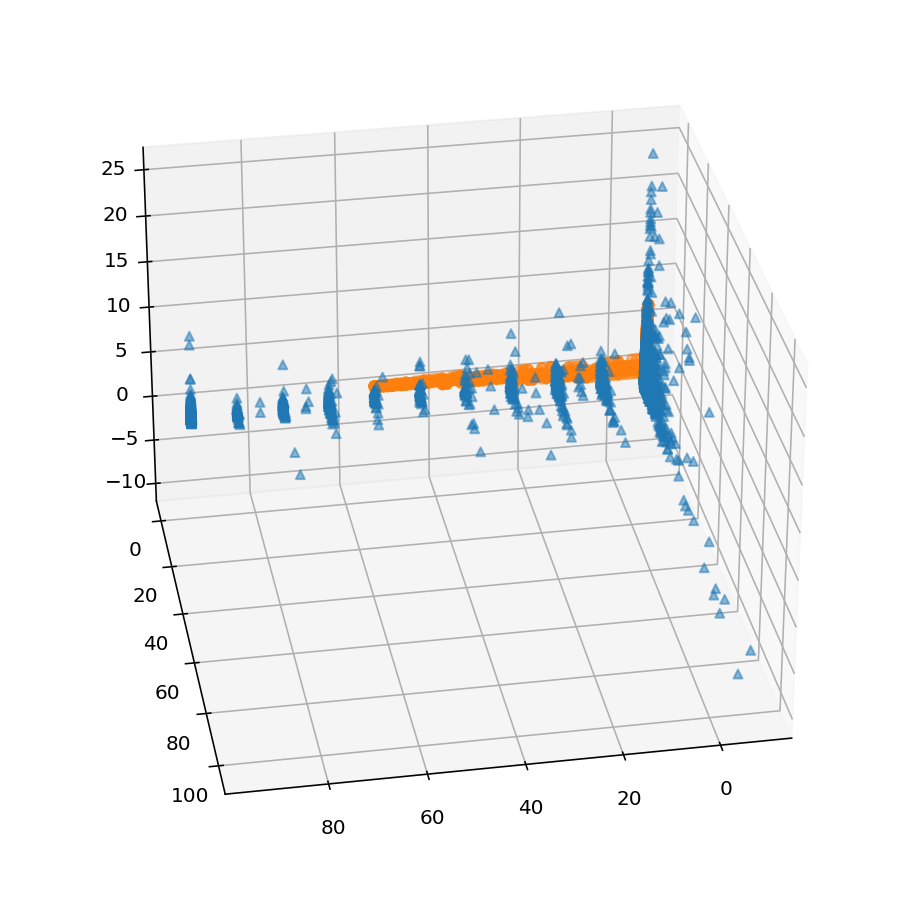

In [105]:
from mpl_toolkits.mplot3d import Axes3D 

markers = ['^','o']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for i, marker in enumerate(markers):
    x_axis_data = DF_pca[DF_pca['target']==i]['component_1']
    y_axis_data = DF_pca[DF_pca['target']==i]['component_2']
    z_axis_data = DF_pca[DF_pca['target']==i]['component_3']
    
    ax.scatter(x_axis_data, y_axis_data, z_axis_data, s= 20, alpha=0.5, marker = marker)

ax.view_init(30, 80)
plt.show()

In [111]:
# plotly 표현 

import plotly.express as px

fig = px.scatter_3d(DF_pca, x = 'component_1', y= 'component_2', z='component_3', color = 'target', symbol = 'target', opacity = 0.4)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [15]:
y_target = DF_pca['target']
X_features = DF_pca.drop('target', axis= 1)


X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target)

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
svm_clf = LinearSVC()

# 학습 진행 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,svm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']
results = get_result_df(models, model_names, X_train, y_train, X_valid, y_valid)
results 


C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` p

Accuracy  precision  recall   f1       roc
LogiReg       0.997283        0.0     0.0  0.0  0.500000
DecisionTree  0.996118        0.0     0.0  0.0  0.499416
RandomFore    0.997283        0.0     0.0  0.0  0.500000
LGBM          0.996894        0.0     0.0  0.0  0.499805
SVC           0.997283        0.0     0.0  0.0  0.500000

In [16]:
#### 샘플링별 확인 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

smt = SMOTE(random_state=13)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

ads = ADASYN(random_state=13)
X_train_ads, y_train_ads = ads.fit_sample(X_train, y_train)

rud = RandomUnderSampler(random_state=13)
X_train_rud, y_train_rud = rud.fit_sample(X_train, y_train)

sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)

rov = RandomOverSampler(random_state=13)
X_train_rov, y_train_rov = rov.fit_sample(X_train, y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']

results_smt = get_result_df(models, model_names, X_train_smt, y_train_smt, X_valid, y_valid)
results_ads = get_result_df(models, model_names, X_train_ads, y_train_ads, X_valid, y_valid)
results_rud = get_result_df(models, model_names, X_train_rud, y_train_rud, X_valid, y_valid)
results_sme = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)
results_rov = get_result_df(models, model_names, X_train_rov, y_train_rov, X_valid, y_valid)


print(results_smt)
print(results_ads)
print(results_rud)
print(results_sme)
print(results_rov)

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due

              Accuracy  precision    recall        f1       roc
LogiReg       0.147127   0.002725  0.857143  0.005432  0.501168
DecisionTree  0.743012   0.004539  0.428571  0.008982  0.586220
RandomFore    0.933230   0.011834  0.285714  0.022727  0.610354
LGBM          0.921584   0.010050  0.285714  0.019417  0.604515
SVC           0.144798   0.002717  0.857143  0.005418  0.500000
              Accuracy  precision    recall        f1       roc
LogiReg       0.146351   0.002722  0.857143  0.005427  0.500779
DecisionTree  0.739130   0.004471  0.428571  0.008850  0.584274
RandomFore    0.932453   0.011696  0.285714  0.022472  0.609965
LGBM          0.930512   0.011364  0.285714  0.021858  0.608992
SVC           0.143245   0.002712  0.857143  0.005408  0.499221
              Accuracy  precision    recall        f1       roc
LogiReg       0.404115   0.003251  0.714286  0.006472  0.558778
DecisionTree  0.558230   0.004382  0.714286  0.008711  0.636045
RandomFore    0.515140   0.003994  0.714

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [17]:
results_rov

Accuracy  precision    recall        f1       roc
LogiReg       0.140916   0.002705  0.857143  0.005393  0.498054
DecisionTree  0.736025   0.004418  0.428571  0.008746  0.582717
RandomFore    0.997283   0.000000  0.000000  0.000000  0.500000
LGBM          0.997283   0.000000  0.000000  0.000000  0.500000
SVC           0.139752   0.002701  0.857143  0.005386  0.497470

## Trial#3
### 변수삭제	원핫인코딩	결측치처리	처리방안 	PCA	샘플링
### 삭제안함	적용안함	처리 안함	없음	4	SMOTE

In [18]:
df_3 = df.copy()

y_target = df_3['fraud_YN']
X_features = df_3.drop('fraud_YN', axis=1)

y_target = df_3['fraud_YN'].reset_index()
y_target = y_target.drop('index', axis=1)

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=4)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2','component_3','component_4']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.tail()


component_1  component_2  component_3  component_4  target
12874   -10.887075    -1.580856     0.932880    -0.715395       0
12875   -10.882941    -1.683657    -0.666694     0.059066       0
12876   -10.890038    -1.575054     0.889376    -0.076425       0
12877   -10.883275    -1.688706    -0.661184    -0.079077       0
12878   -10.909166     0.499242     0.074255    -0.183389       0

In [20]:
y_target = DF_pca['target']
X_features = DF_pca.drop('target', axis= 1)


X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target)

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
svm_clf = LinearSVC()

# 학습 진행 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,svm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']
results = get_result_df(models, model_names, X_train, y_train, X_valid, y_valid)
results 


C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, inc

Accuracy  precision  recall   f1       roc
LogiReg       0.997283        0.0     0.0  0.0  0.500000
DecisionTree  0.995730        0.0     0.0  0.0  0.499221
RandomFore    0.997283        0.0     0.0  0.0  0.500000
LGBM          0.997283        0.0     0.0  0.0  0.500000
SVC           0.997283        0.0     0.0  0.0  0.500000

In [21]:
#### 샘플링별 확인 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

smt = SMOTE(random_state=13)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

ads = ADASYN(random_state=13)
X_train_ads, y_train_ads = ads.fit_sample(X_train, y_train)

rud = RandomUnderSampler(random_state=13)
X_train_rud, y_train_rud = rud.fit_sample(X_train, y_train)

sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)

rov = RandomOverSampler(random_state=13)
X_train_rov, y_train_rov = rov.fit_sample(X_train, y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']

results_smt = get_result_df(models, model_names, X_train_smt, y_train_smt, X_valid, y_valid)
results_ads = get_result_df(models, model_names, X_train_ads, y_train_ads, X_valid, y_valid)
results_rud = get_result_df(models, model_names, X_train_rud, y_train_rud, X_valid, y_valid)
results_sme = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)
results_rov = get_result_df(models, model_names, X_train_rov, y_train_rov, X_valid, y_valid)


print(results_smt)
print(results_ads)
print(results_rud)
print(results_sme)
print(results_rov)

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due

              Accuracy  precision    recall        f1       roc
LogiReg       0.631599   0.004211  0.571429  0.008359  0.601596
DecisionTree  0.661102   0.003440  0.428571  0.006826  0.545154
RandomFore    0.962733   0.000000  0.000000  0.000000  0.482678
LGBM          0.963509   0.011236  0.142857  0.020833  0.554301
SVC           0.619565   0.004077  0.571429  0.008097  0.595562
              Accuracy  precision    recall        f1       roc
LogiReg       0.635870   0.004260  0.571429  0.008457  0.603737
DecisionTree  0.702640   0.003922  0.428571  0.007772  0.565979
RandomFore    0.960404   0.000000  0.000000  0.000000  0.481510
LGBM          0.965062   0.000000  0.000000  0.000000  0.483846
SVC           0.611413   0.003992  0.571429  0.007929  0.591475
              Accuracy  precision    recall        f1       roc
LogiReg       0.650621   0.004440  0.571429  0.008811  0.611133
DecisionTree  0.544255   0.004248  0.714286  0.008446  0.629039
RandomFore    0.564053   0.005319  0.857

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [76]:
results_sme

Accuracy  precision    recall        f1       roc
LogiReg       0.665373   0.004635  0.571429  0.009195  0.618529
DecisionTree  0.601320   0.002924  0.428571  0.005808  0.515181
RandomFore    0.952640   0.000000  0.000000  0.000000  0.477618
LGBM          0.953804   0.000000  0.000000  0.000000  0.478202
SVC           0.671196   0.004717  0.571429  0.009357  0.621448

## Trial#4
### 변수삭제	원핫인코딩	결측치처리	처리방안 	PCA	샘플링
### 삭제안함	적용안함	처리 안함	없음	5	SMOTE

In [23]:
df_4 = df.copy()

y_target = df_4['fraud_YN']
X_features = df_4.drop('fraud_YN', axis=1)

y_target = df_4['fraud_YN'].reset_index()
y_target = y_target.drop('index', axis=1)

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=5)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2','component_3','component_4','component_5']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.tail()


component_1  component_2  component_3  component_4  component_5  target
12874   -10.887075    -1.580856     0.932879    -0.715384     0.206668       0
12875   -10.882941    -1.683657    -0.666695     0.059070    -0.826409       0
12876   -10.890038    -1.575054     0.889376    -0.076415    -0.423429       0
12877   -10.883275    -1.688706    -0.661184    -0.079081    -0.856999       0
12878   -10.909166     0.499242     0.074255    -0.183391    -0.636614       0

In [25]:
y_target = DF_pca['target']
X_features = DF_pca.drop('target', axis= 1)


X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target)

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
svm_clf = LinearSVC()

# 학습 진행 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,svm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']
results = get_result_df(models, model_names, X_train, y_train, X_valid, y_valid)
results 


C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, inc

Accuracy  precision  recall   f1       roc
LogiReg       0.997283        0.0     0.0  0.0  0.500000
DecisionTree  0.995730        0.0     0.0  0.0  0.499221
RandomFore    0.997283        0.0     0.0  0.0  0.500000
LGBM          0.997283        0.0     0.0  0.0  0.500000
SVC           0.997283        0.0     0.0  0.0  0.500000

In [26]:
#### 샘플링별 확인 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

smt = SMOTE(random_state=13)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

ads = ADASYN(random_state=13)
X_train_ads, y_train_ads = ads.fit_sample(X_train, y_train)

rud = RandomUnderSampler(random_state=13)
X_train_rud, y_train_rud = rud.fit_sample(X_train, y_train)

sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)

rov = RandomOverSampler(random_state=13)
X_train_rov, y_train_rov = rov.fit_sample(X_train, y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']

results_smt = get_result_df(models, model_names, X_train_smt, y_train_smt, X_valid, y_valid)
results_ads = get_result_df(models, model_names, X_train_ads, y_train_ads, X_valid, y_valid)
results_rud = get_result_df(models, model_names, X_train_rud, y_train_rud, X_valid, y_valid)
results_sme = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)
results_rov = get_result_df(models, model_names, X_train_rov, y_train_rov, X_valid, y_valid)


print(results_smt)
print(results_ads)
print(results_rud)
print(results_sme)
print(results_rov)

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due

              Accuracy  precision    recall        f1       roc
LogiReg       0.684783   0.004920  0.571429  0.009756  0.628260
DecisionTree  0.547748   0.003431  0.571429  0.006820  0.559556
RandomFore    0.972438   0.000000  0.000000  0.000000  0.487544
LGBM          0.971273   0.000000  0.000000  0.000000  0.486960
SVC           0.655280   0.004499  0.571429  0.008929  0.613468
              Accuracy  precision    recall        f1       roc
LogiReg       0.685559   0.004932  0.571429  0.009780  0.628649
DecisionTree  0.696817   0.003846  0.428571  0.007624  0.563060
RandomFore    0.973214   0.000000  0.000000  0.000000  0.487933
LGBM          0.973991   0.000000  0.000000  0.000000  0.488322
SVC           0.743012   0.006033  0.571429  0.011940  0.657454
              Accuracy  precision    recall        f1       roc
LogiReg       0.803183   0.005929  0.428571  0.011696  0.616388
DecisionTree  0.559783   0.005268  0.857143  0.010471  0.708058
RandomFore    0.549301   0.005146  0.857

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [27]:
results_rov

Accuracy  precision    recall        f1       roc
LogiReg       0.777174   0.006957  0.571429  0.013746  0.674582
DecisionTree  0.572593   0.003630  0.571429  0.007214  0.572012
RandomFore    0.997283   0.000000  0.000000  0.000000  0.500000
LGBM          0.996894   0.000000  0.000000  0.000000  0.499805
SVC           0.784938   0.007207  0.571429  0.014235  0.678474

## Trial#5
### 변수삭제	원핫인코딩	결측치처리   	처리방안 
### 삭제안함	적용안함	repair cost 	평균	

############## 보간법을 사용하여 null 값 처리 

In [28]:
df_5 = df.copy()

y_target = df_5['fraud_YN']
X_features = df_5.drop('fraud_YN', axis=1)

y_target = df_5['fraud_YN'].reset_index()
y_target = y_target.drop('index', axis=1)

In [29]:
from sklearn.impute import KNNImputer

X_features['repair_cost'].replace(0, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=2)

#repair_cost에만 결측치 처리해줌 
X_features_filled = pd.DataFrame(imputer.fit_transform(X_features))
X_features_filled


0    1    2    3    4    5      6    7    8    9   ...         14  \
0      2.0  1.0  3.0  0.0  2.0  0.0  100.0  2.0  0.0  0.0  ...        0.0   
1      3.0  1.0  3.0  0.0  4.0  0.0    0.0  2.0  0.0  0.0  ...        0.0   
2      1.0  0.0  1.0  0.0  1.0  0.0  100.0  1.0  0.0  0.0  ...  1209410.0   
3      1.0  1.0  3.0  0.0  4.0  0.0  100.0  3.0  0.0  0.0  ...  1217280.0   
4      2.0  0.0  4.0  0.0  4.0  0.0    0.0  1.0  0.0  0.0  ...        0.0   
...    ...  ...  ...  ...  ...  ...    ...  ...  ...  ...  ...        ...   
12874  2.0  0.0  3.0  1.0  4.0  0.0  100.0  1.0  0.0  0.0  ...        0.0   
12875  2.0  0.0  2.0  0.0  2.0  0.0  100.0  2.0  0.0  0.0  ...        0.0   
12876  2.0  0.0  2.0  1.0  4.0  0.0  100.0  1.0  1.0  0.0  ...        0.0   
12877  2.0  0.0  2.0  0.0  2.0  0.0  100.0  2.0  0.0  0.0  ...        0.0   
12878  2.0  0.0  2.0  0.0  1.0  0.0  100.0  1.0  0.0  0.0  ...  1188750.0   

        15   16   17   18   19   20   21   22   23  
0      1.0  0.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
1      3.0  1.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
2      1.0  0.0  0.0  2.0  0.0  0.0  0.0 -1.0  0.0  
3      0.0  0.0  0.0  1.0  1.0  2.0  1.0  2.0  0.0  
4      1.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  
12874  0.0  0.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
12875  1.0  1.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
12876  2.0  1.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
12877  4.0  1.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
12878  2.0  0.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  

[12879 rows x 24 columns]

In [30]:
X_features

car_model  sharing_type  age_group  has_previous_accident  \
0              2             1          3                      0   
3              3             1          3                      0   
4              1             0          1                      0   
6              1             1          3                      0   
8              2             0          4                      0   
...          ...           ...        ...                    ...   
15994          2             0          3                      1   
15995          2             0          2                      0   
15996          2             0          2                      1   
15998          2             0          2                      0   
15999          2             0          2                      0   

       cumulative_use_count  b2b  accident_ratio  pf_type  socarpass  \
0                         2    0             100        2          0   
3                         4    0               0        2          0   
4                         1    0             100        1          0   
6                         4    0             100        3          0   
8                         4    0               0        1          0   
...                     ...  ...             ...      ...        ...   
15994                     4    0             100        1          0   
15995                     2    0             100        2          0   
15996                     4    0             100        1          1   
15998                     2    0             100        2          0   
15999                     1    0             100        1          0   

       socarsave  ...  insure_cost  accident_location  car_part1  car_part2  \
0              0  ...            0                  1          0          0   
3              0  ...            0                  3          1          0   
4              0  ...      1209410                  1          0          0   
6              0  ...      1217280                  0          0          0   
8              0  ...            0                  1          0          0   
...          ...  ...          ...                ...        ...        ...   
15994          0  ...            0                  0          0          0   
15995          0  ...            0                  1          1          0   
15996          0  ...            0                  2          1          0   
15998          0  ...            0                  4          1          0   
15999          0  ...      1188750                  2          0          0   

       repair_cnt  acc_type1  insurance_site_aid_YN  police_site_aid_YN  \
0               1          0                      0                   0   
3               1          0                      0                   0   
4               2          0                      0                   0   
6               1          1                      2                   1   
8               1          1                      1                   1   
...           ...        ...                    ...                 ...   
15994           1          0                      0                   0   
15995           1          0                      0                   0   
15996           1          0                      0                   0   
15998           1          0                      0                   0   
15999           1          0                      0                   0   

       total_prsn_cnt  test_set  
0                  -1         0  
3                  -1         0  
4                  -1         0  
6                   2         0  
8                   2         0  
...               ...       ...  
15994              -1         0  
15995              -1         0  
15996              -1         0  
15998              -1         0  
15999              -1         0  

[12879 rows x 24 columns]

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(X_features_filled)

pca = PCA(n_components=2)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.tail()


component_1  component_2  target
12874   -10.885141    -1.523035       0
12875   -10.885749    -1.682435       0
12876   -10.887959    -1.533113       0
12877   -10.888302    -1.634374       0
12878   -10.906433     0.452169       0

In [32]:
y_target = DF_pca['target']
X_features = DF_pca.drop('target', axis= 1)


X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target)

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
svm_clf = LinearSVC()

# 학습 진행 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,svm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']
results = get_result_df(models, model_names, X_train, y_train, X_valid, y_valid)
results 


C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` p

Accuracy  precision  recall   f1       roc
LogiReg       0.997283        0.0     0.0  0.0  0.500000
DecisionTree  0.996506        0.0     0.0  0.0  0.499611
RandomFore    0.997283        0.0     0.0  0.0  0.500000
LGBM          0.995730        0.0     0.0  0.0  0.499221
SVC           0.997283        0.0     0.0  0.0  0.500000

In [33]:
#### 샘플링별 확인 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

smt = SMOTE(random_state=13)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

ads = ADASYN(random_state=13)
X_train_ads, y_train_ads = ads.fit_sample(X_train, y_train)

rud = RandomUnderSampler(random_state=13)
X_train_rud, y_train_rud = rud.fit_sample(X_train, y_train)

sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)

rov = RandomOverSampler(random_state=13)
X_train_rov, y_train_rov = rov.fit_sample(X_train, y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']

results_smt = get_result_df(models, model_names, X_train_smt, y_train_smt, X_valid, y_valid)
results_ads = get_result_df(models, model_names, X_train_ads, y_train_ads, X_valid, y_valid)
results_rud = get_result_df(models, model_names, X_train_rud, y_train_rud, X_valid, y_valid)
results_sme = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)
results_rov = get_result_df(models, model_names, X_train_rov, y_train_rov, X_valid, y_valid)


print(results_smt)
print(results_ads)
print(results_rud)
print(results_sme)
print(results_rov)

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due

              Accuracy  precision    recall        f1       roc
LogiReg       0.139363   0.002700  0.857143  0.005384  0.497275
DecisionTree  0.559006   0.003518  0.571429  0.006993  0.565200
RandomFore    0.836568   0.004785  0.285714  0.009412  0.561892
LGBM          0.831134   0.004630  0.285714  0.009112  0.559167
SVC           0.654115   0.004484  0.571429  0.008899  0.612884
              Accuracy  precision    recall        f1       roc
LogiReg       0.139363   0.002700  0.857143  0.005384  0.497275
DecisionTree  0.559783   0.003524  0.571429  0.007005  0.565590
RandomFore    0.838509   0.004843  0.285714  0.009524  0.562865
LGBM          0.825699   0.004484  0.285714  0.008830  0.556442
SVC           0.139363   0.002700  0.857143  0.005384  0.497275
              Accuracy  precision    recall        f1       roc
LogiReg       0.749612   0.001563  0.142857  0.003091  0.447061
DecisionTree  0.521351   0.003241  0.571429  0.006446  0.546322
RandomFore    0.515916   0.003205  0.571

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [34]:
results_rov

Accuracy  precision    recall        f1       roc
LogiReg       0.139363   0.002700  0.857143  0.005384  0.497275
DecisionTree  0.897127   0.007634  0.285714  0.014870  0.592254
RandomFore    0.997283   0.000000  0.000000  0.000000  0.500000
LGBM          0.996894   0.000000  0.000000  0.000000  0.499805
SVC           0.142857   0.002711  0.857143  0.005405  0.499027

## Trial#6 
### 변수삭제	원핫인코딩	결측치처리   	처리방안 PCA 
### 삭제안함	적용안함	repair cost 	KNN 	3 

In [35]:
df_6 = df.copy()

y_target = df_6['fraud_YN']
X_features = df_6.drop('fraud_YN', axis=1)

y_target = df_6['fraud_YN'].reset_index()
y_target = y_target.drop('index', axis=1)

In [36]:
from sklearn.impute import KNNImputer

X_features['repair_cost'].replace(0, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=2)

#repair_cost에만 결측치 처리해줌 
X_features_filled = pd.DataFrame(imputer.fit_transform(X_features))
X_features_filled


0    1    2    3    4    5      6    7    8    9   ...         14  \
0      2.0  1.0  3.0  0.0  2.0  0.0  100.0  2.0  0.0  0.0  ...        0.0   
1      3.0  1.0  3.0  0.0  4.0  0.0    0.0  2.0  0.0  0.0  ...        0.0   
2      1.0  0.0  1.0  0.0  1.0  0.0  100.0  1.0  0.0  0.0  ...  1209410.0   
3      1.0  1.0  3.0  0.0  4.0  0.0  100.0  3.0  0.0  0.0  ...  1217280.0   
4      2.0  0.0  4.0  0.0  4.0  0.0    0.0  1.0  0.0  0.0  ...        0.0   
...    ...  ...  ...  ...  ...  ...    ...  ...  ...  ...  ...        ...   
12874  2.0  0.0  3.0  1.0  4.0  0.0  100.0  1.0  0.0  0.0  ...        0.0   
12875  2.0  0.0  2.0  0.0  2.0  0.0  100.0  2.0  0.0  0.0  ...        0.0   
12876  2.0  0.0  2.0  1.0  4.0  0.0  100.0  1.0  1.0  0.0  ...        0.0   
12877  2.0  0.0  2.0  0.0  2.0  0.0  100.0  2.0  0.0  0.0  ...        0.0   
12878  2.0  0.0  2.0  0.0  1.0  0.0  100.0  1.0  0.0  0.0  ...  1188750.0   

        15   16   17   18   19   20   21   22   23  
0      1.0  0.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
1      3.0  1.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
2      1.0  0.0  0.0  2.0  0.0  0.0  0.0 -1.0  0.0  
3      0.0  0.0  0.0  1.0  1.0  2.0  1.0  2.0  0.0  
4      1.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  
12874  0.0  0.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
12875  1.0  1.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
12876  2.0  1.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
12877  4.0  1.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
12878  2.0  0.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  

[12879 rows x 24 columns]

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(X_features_filled)

pca = PCA(n_components=3)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2','component_3']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.tail()


component_1  component_2  component_3  target
12874   -10.885141    -1.523035     0.970345       0
12875   -10.885749    -1.682435    -0.275937       0
12876   -10.887959    -1.533113     0.818696       0
12877   -10.888302    -1.634374     0.106458       0
12878   -10.906433     0.452169    -0.345692       0

In [38]:
y_target = DF_pca['target']
X_features = DF_pca.drop('target', axis= 1)


X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target)

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
svm_clf = LinearSVC()

# 학습 진행 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,svm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']
results = get_result_df(models, model_names, X_train, y_train, X_valid, y_valid)
results 


C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, inc

Accuracy  precision  recall   f1       roc
LogiReg       0.997283        0.0     0.0  0.0  0.500000
DecisionTree  0.997283        0.0     0.0  0.0  0.500000
RandomFore    0.997283        0.0     0.0  0.0  0.500000
LGBM          0.996894        0.0     0.0  0.0  0.499805
SVC           0.997283        0.0     0.0  0.0  0.500000

In [39]:
#### 샘플링별 확인 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

smt = SMOTE(random_state=13)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

ads = ADASYN(random_state=13)
X_train_ads, y_train_ads = ads.fit_sample(X_train, y_train)

rud = RandomUnderSampler(random_state=13)
X_train_rud, y_train_rud = rud.fit_sample(X_train, y_train)

sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)

rov = RandomOverSampler(random_state=13)
X_train_rov, y_train_rov = rov.fit_sample(X_train, y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']

results_smt = get_result_df(models, model_names, X_train_smt, y_train_smt, X_valid, y_valid)
results_ads = get_result_df(models, model_names, X_train_ads, y_train_ads, X_valid, y_valid)
results_rud = get_result_df(models, model_names, X_train_rud, y_train_rud, X_valid, y_valid)
results_sme = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)
results_rov = get_result_df(models, model_names, X_train_rov, y_train_rov, X_valid, y_valid)


print(results_smt)
print(results_ads)
print(results_rud)
print(results_sme)
print(results_rov)

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due

              Accuracy  precision    recall        f1       roc
LogiReg       0.139363   0.002700  0.857143  0.005384  0.497275
DecisionTree  0.854425   0.002703  0.142857  0.005305  0.499611
RandomFore    0.933618   0.006024  0.142857  0.011561  0.539315
LGBM          0.922360   0.005128  0.142857  0.009901  0.533671
SVC           0.139363   0.002700  0.857143  0.005384  0.497275
              Accuracy  precision    recall        f1       roc
LogiReg       0.139363   0.002700  0.857143  0.005384  0.497275
DecisionTree  0.784938   0.003630  0.285714  0.007168  0.536006
RandomFore    0.929736   0.005682  0.142857  0.010929  0.537369
LGBM          0.916149   0.004739  0.142857  0.009174  0.530557
SVC           0.139363   0.002700  0.857143  0.005384  0.497275
              Accuracy  precision    recall        f1       roc
LogiReg       0.501941   0.003115  0.571429  0.006197  0.536590
DecisionTree  0.535326   0.003339  0.571429  0.006639  0.553328
RandomFore    0.421972   0.004016  0.857

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [40]:
results_rov

Accuracy  precision    recall        f1       roc
LogiReg       0.337733   0.002926  0.714286  0.005828  0.525496
DecisionTree  0.870342   0.003040  0.142857  0.005952  0.507591
RandomFore    0.997283   0.000000  0.000000  0.000000  0.500000
LGBM          0.996506   0.000000  0.000000  0.000000  0.499611
SVC           0.623835   0.003099  0.428571  0.006154  0.526469

## Trial#6
## 변수삭제 원핫인코딩 결측치처리 처리방안 PCA
## 삭제안함 적용안함 repair cost KNN 4

In [41]:
df_7 = df.copy()

y_target = df_7['fraud_YN']
X_features = df_7.drop('fraud_YN', axis=1)

y_target = df_7['fraud_YN'].reset_index()
y_target = y_target.drop('index', axis=1)

In [42]:
from sklearn.impute import KNNImputer

X_features['repair_cost'].replace(0, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=2)

#repair_cost에만 결측치 처리해줌 
X_features_filled = pd.DataFrame(imputer.fit_transform(X_features))
X_features_filled


0    1    2    3    4    5      6    7    8    9   ...         14  \
0      2.0  1.0  3.0  0.0  2.0  0.0  100.0  2.0  0.0  0.0  ...        0.0   
1      3.0  1.0  3.0  0.0  4.0  0.0    0.0  2.0  0.0  0.0  ...        0.0   
2      1.0  0.0  1.0  0.0  1.0  0.0  100.0  1.0  0.0  0.0  ...  1209410.0   
3      1.0  1.0  3.0  0.0  4.0  0.0  100.0  3.0  0.0  0.0  ...  1217280.0   
4      2.0  0.0  4.0  0.0  4.0  0.0    0.0  1.0  0.0  0.0  ...        0.0   
...    ...  ...  ...  ...  ...  ...    ...  ...  ...  ...  ...        ...   
12874  2.0  0.0  3.0  1.0  4.0  0.0  100.0  1.0  0.0  0.0  ...        0.0   
12875  2.0  0.0  2.0  0.0  2.0  0.0  100.0  2.0  0.0  0.0  ...        0.0   
12876  2.0  0.0  2.0  1.0  4.0  0.0  100.0  1.0  1.0  0.0  ...        0.0   
12877  2.0  0.0  2.0  0.0  2.0  0.0  100.0  2.0  0.0  0.0  ...        0.0   
12878  2.0  0.0  2.0  0.0  1.0  0.0  100.0  1.0  0.0  0.0  ...  1188750.0   

        15   16   17   18   19   20   21   22   23  
0      1.0  0.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
1      3.0  1.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
2      1.0  0.0  0.0  2.0  0.0  0.0  0.0 -1.0  0.0  
3      0.0  0.0  0.0  1.0  1.0  2.0  1.0  2.0  0.0  
4      1.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  
12874  0.0  0.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
12875  1.0  1.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
12876  2.0  1.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
12877  4.0  1.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
12878  2.0  0.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  

[12879 rows x 24 columns]

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(X_features_filled)

pca = PCA(n_components=4)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2','component_3','component_4']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.tail()


component_1  component_2  component_3  component_4  target
12874   -10.885141    -1.523035     0.970345    -0.725872       0
12875   -10.885749    -1.682435    -0.275938     0.050040       0
12876   -10.887959    -1.533113     0.818696    -0.107134       0
12877   -10.888302    -1.634374     0.106458    -0.087178       0
12878   -10.906433     0.452169    -0.345692    -0.203565       0

In [44]:
y_target = DF_pca['target']
X_features = DF_pca.drop('target', axis= 1)


X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target)

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
svm_clf = LinearSVC()

# 학습 진행 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,svm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']
results = get_result_df(models, model_names, X_train, y_train, X_valid, y_valid)
results 


C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, inc

Accuracy  precision  recall   f1       roc
LogiReg       0.997283        0.0     0.0  0.0  0.500000
DecisionTree  0.996506        0.0     0.0  0.0  0.499611
RandomFore    0.997283        0.0     0.0  0.0  0.500000
LGBM          0.997283        0.0     0.0  0.0  0.500000
SVC           0.997283        0.0     0.0  0.0  0.500000

In [45]:
#### 샘플링별 확인 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

smt = SMOTE(random_state=13)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

ads = ADASYN(random_state=13)
X_train_ads, y_train_ads = ads.fit_sample(X_train, y_train)

rud = RandomUnderSampler(random_state=13)
X_train_rud, y_train_rud = rud.fit_sample(X_train, y_train)

sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)

rov = RandomOverSampler(random_state=13)
X_train_rov, y_train_rov = rov.fit_sample(X_train, y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']

results_smt = get_result_df(models, model_names, X_train_smt, y_train_smt, X_valid, y_valid)
results_ads = get_result_df(models, model_names, X_train_ads, y_train_ads, X_valid, y_valid)
results_rud = get_result_df(models, model_names, X_train_rud, y_train_rud, X_valid, y_valid)
results_sme = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)
results_rov = get_result_df(models, model_names, X_train_rov, y_train_rov, X_valid, y_valid)


print(results_smt)
print(results_ads)
print(results_rud)
print(results_sme)
print(results_rov)

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due

              Accuracy  precision    recall        f1       roc
LogiReg       0.640916    0.00432  0.571429  0.008574  0.606267
DecisionTree  0.475155    0.00369  0.714286  0.007342  0.594395
RandomFore    0.961957    0.00000  0.000000  0.000000  0.482289
LGBM          0.966227    0.00000  0.000000  0.000000  0.484430
SVC           0.505823    0.00314  0.571429  0.006245  0.538536
              Accuracy  precision    recall        f1       roc
LogiReg       0.642857   0.004343  0.571429  0.008621  0.607240
DecisionTree  0.599767   0.002913  0.428571  0.005786  0.514402
RandomFore    0.962345   0.000000  0.000000  0.000000  0.482483
LGBM          0.966615   0.000000  0.000000  0.000000  0.484624
SVC           0.626553   0.004154  0.571429  0.008247  0.599066
              Accuracy  precision    recall        f1       roc
LogiReg       0.655280   0.004499  0.571429  0.008929  0.613468
DecisionTree  0.688665   0.004981  0.571429  0.009877  0.630206
RandomFore    0.512811   0.003185  0.571

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [46]:
results_rov

Accuracy  precision    recall        f1       roc
LogiReg       0.638587   0.003226  0.428571  0.006403  0.533865
DecisionTree  0.880047   0.009740  0.428571  0.019048  0.654924
RandomFore    0.997283   0.000000  0.000000  0.000000  0.500000
LGBM          0.997283   0.000000  0.000000  0.000000  0.500000
SVC           0.633540   0.003181  0.428571  0.006316  0.531335

In [47]:
## 다시 

In [48]:
df_8 = df.copy()

df_8 = df_8.drop(columns=['sharing_type', 'has_previous_accident','b2b','accident_ratio','socarpass', 'car_part2'])
df_8

y_target = df_8['fraud_YN']
X_features = df_8.drop('fraud_YN', axis=1)

y_target = df_8['fraud_YN'].reset_index()
y_target = y_target.drop('index', axis=1)

In [49]:
from sklearn.impute import KNNImputer

X_features['repair_cost'].replace(0, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=2)

#repair_cost에만 결측치 처리해줌 
X_features_filled = pd.DataFrame(imputer.fit_transform(X_features))
X_features_filled


0    1    2    3    4    5    6    7             8          9    10  \
0      2.0  3.0  2.0  2.0  0.0  4.0  2.0  4.0  1.302547e+05        0.0  1.0   
1      3.0  3.0  4.0  2.0  0.0  3.0  3.0  5.0  1.341009e+06        0.0  3.0   
2      1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  5.240306e+05  1209410.0  1.0   
3      1.0  3.0  4.0  3.0  0.0  6.0  3.0  1.0  2.027687e+05  1217280.0  0.0   
4      2.0  4.0  4.0  1.0  0.0  4.0  2.0  6.0  5.024733e+05        0.0  1.0   
...    ...  ...  ...  ...  ...  ...  ...  ...           ...        ...  ...   
12874  2.0  3.0  4.0  1.0  0.0  4.0  1.0  4.0  6.672931e+05        0.0  0.0   
12875  2.0  2.0  2.0  2.0  0.0  1.0  1.0  1.0  3.166390e+05        0.0  1.0   
12876  2.0  2.0  4.0  1.0  0.0  5.0  2.0  6.0  6.184394e+05        0.0  2.0   
12877  2.0  2.0  2.0  2.0  0.0  6.0  1.0  2.0  4.210425e+05        0.0  4.0   
12878  2.0  2.0  1.0  1.0  0.0  6.0  5.0  6.0  3.915602e+05  1188750.0  2.0   

        11   12   13   14   15   16   17  
0      0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
1      1.0  1.0  0.0  0.0  0.0 -1.0  0.0  
2      0.0  2.0  0.0  0.0  0.0 -1.0  0.0  
3      0.0  1.0  1.0  2.0  1.0  2.0  0.0  
4      0.0  1.0  1.0  1.0  1.0  2.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
12874  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  
12875  1.0  1.0  0.0  0.0  0.0 -1.0  0.0  
12876  1.0  1.0  0.0  0.0  0.0 -1.0  0.0  
12877  1.0  1.0  0.0  0.0  0.0 -1.0  0.0  
12878  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  

[12879 rows x 18 columns]

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features_filled)

pca = PCA(n_components=3)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2','component_3']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.tail()


component_1  component_2  component_3  target
12874    -0.985572    -0.456392    -0.060624       0
12875    -1.089019     1.146091    -1.192952       0
12876    -1.028362    -0.169332     1.218398       0
12877    -1.247080     0.328187     0.452678       0
12878    -1.173919    -1.506193     1.692280       0

In [51]:
y_target = DF_pca['target']
X_features = DF_pca.drop('target', axis= 1)


X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target)

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
svm_clf = LinearSVC()

# 학습 진행 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,svm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']
results = get_result_df(models, model_names, X_train, y_train, X_valid, y_valid)

results 


C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, inc

Accuracy  precision  recall   f1       roc
LogiReg       0.997283        0.0     0.0  0.0  0.500000
DecisionTree  0.997283        0.0     0.0  0.0  0.500000
RandomFore    0.997283        0.0     0.0  0.0  0.500000
LGBM          0.996506        0.0     0.0  0.0  0.499611
SVC           0.997283        0.0     0.0  0.0  0.500000

In [52]:
# 복합 샘플링 적용 

from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)


model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']
results = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)

results

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy  precision    recall        f1       roc
LogiReg       0.710404   0.005355  0.571429  0.010610  0.641105
DecisionTree  0.413043   0.002644  0.571429  0.005263  0.492020
RandomFore    0.908385   0.004329  0.142857  0.008403  0.526664
LGBM          0.911491   0.004484  0.142857  0.008696  0.528221
SVC           0.717003   0.005479  0.571429  0.010855  0.644414

## Trial#9
## 변수삭제 원핫인코딩 결측치처리 처리방안 PCA
## 동일분포 적용안함   처리안함           3


In [53]:
df_9 = df.copy()

y_target = df_9['fraud_YN']
X_features = df_9.drop(columns= ['fraud_YN','sharing_type','has_previous_accident','socarpass','car_part2'], axis=1)

y_target = df_9['fraud_YN'].reset_index()
y_target = y_target.drop('index', axis=1)

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=2)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2',]

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.head()


component_1  component_2  target
0   -10.877729    -1.681253       0
1    89.088871    -0.447212       0
2   -10.919369     0.595308       0
3   -10.861171     0.626681       1
4    89.146900    -0.591666       0

In [55]:
y_target = DF_pca['target']
X_features = DF_pca.drop('target', axis= 1)


X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target)

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
svm_clf = LinearSVC()

# 학습 진행 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,svm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']
results = get_result_df(models, model_names, X_train, y_train, X_valid, y_valid)
results 

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` p

Accuracy  precision  recall   f1       roc
LogiReg       0.997283        0.0     0.0  0.0  0.500000
DecisionTree  0.996118        0.0     0.0  0.0  0.499416
RandomFore    0.997283        0.0     0.0  0.0  0.500000
LGBM          0.996894        0.0     0.0  0.0  0.499805
SVC           0.997283        0.0     0.0  0.0  0.500000

In [56]:
#### 샘플링별 확인 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

smt = SMOTE(random_state=13)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

ads = ADASYN(random_state=13)
X_train_ads, y_train_ads = ads.fit_sample(X_train, y_train)

rud = RandomUnderSampler(random_state=13)
X_train_rud, y_train_rud = rud.fit_sample(X_train, y_train)

sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)

rov = RandomOverSampler(random_state=13)
X_train_rov, y_train_rov = rov.fit_sample(X_train, y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']

results_smt = get_result_df(models, model_names, X_train_smt, y_train_smt, X_valid, y_valid)
results_ads = get_result_df(models, model_names, X_train_ads, y_train_ads, X_valid, y_valid)
results_rud = get_result_df(models, model_names, X_train_rud, y_train_rud, X_valid, y_valid)
results_sme = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)
results_rov = get_result_df(models, model_names, X_train_rov, y_train_rov, X_valid, y_valid)


print(results_smt)
print(results_ads)
print(results_rud)
print(results_sme)
print(results_rov)

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              Accuracy  precision    recall        f1       roc
LogiReg       0.139363   0.002700  0.857143  0.005384  0.497275
DecisionTree  0.823758   0.004435  0.285714  0.008734  0.555469
RandomFore    0.835016   0.004739  0.285714  0.009324  0.561113
LGBM          0.819099   0.002169  0.142857  0.004274  0.481900
SVC           0.139363   0.002700  0.857143  0.005384  0.497275
              Accuracy  precision    recall        f1       roc
LogiReg       0.139363   0.002700  0.857143  0.005384  0.497275
DecisionTree  0.813665   0.004193  0.285714  0.008264  0.550409
RandomFore    0.827252   0.004525  0.285714  0.008909  0.557221
LGBM          0.821817   0.002203  0.142857  0.004338  0.483262
SVC           0.142857   0.002711  0.857143  0.005405  0.499027
              Accuracy  precision    recall        f1       roc
LogiReg       0.746894   0.001546  0.142857  0.003058  0.445699
DecisionTree  0.515916   0.004000  0.714286  0.007955  0.614831
RandomFore    0.531832   0.004136  0.714

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## Trial#9
## 변수삭제 원핫인코딩 결측치처리 처리방안 PCA
## 동일분포 적용안함   처리안함           3


In [57]:
df_10 = df.copy()

y_target = df_10['fraud_YN']
X_features = df_10.drop(columns= ['fraud_YN','sharing_type','has_previous_accident','socarpass','car_part2'], axis=1)

y_target = df_10['fraud_YN'].reset_index()
y_target = y_target.drop('index', axis=1)

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=3)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2','component_3']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.head()


component_1  component_2  component_3  target
0   -10.877729    -1.681253    -0.444087       0
1    89.088871    -0.447212     3.487825       0
2   -10.919369     0.595308     0.763929       0
3   -10.861171     0.626681    -1.254945       1
4    89.146900    -0.591666    -0.511243       0

In [59]:
y_target = DF_pca['target']
X_features = DF_pca.drop('target', axis= 1)


X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target)

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
svm_clf = LinearSVC()

# 학습 진행 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,svm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']
results = get_result_df(models, model_names, X_train, y_train, X_valid, y_valid)
results 

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` p

Accuracy  precision    recall        f1       roc
LogiReg       0.997283        0.0  0.000000  0.000000  0.500000
DecisionTree  0.996118        0.0  0.000000  0.000000  0.499416
RandomFore    0.997283        0.0  0.000000  0.000000  0.500000
LGBM          0.997283        0.5  0.142857  0.222222  0.571234
SVC           0.997283        0.0  0.000000  0.000000  0.500000

In [60]:
#### 샘플링별 확인 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

smt = SMOTE(random_state=13)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

ads = ADASYN(random_state=13)
X_train_ads, y_train_ads = ads.fit_sample(X_train, y_train)

rud = RandomUnderSampler(random_state=13)
X_train_rud, y_train_rud = rud.fit_sample(X_train, y_train)

sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)

rov = RandomOverSampler(random_state=13)
X_train_rov, y_train_rov = rov.fit_sample(X_train, y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']

results_smt = get_result_df(models, model_names, X_train_smt, y_train_smt, X_valid, y_valid)
results_ads = get_result_df(models, model_names, X_train_ads, y_train_ads, X_valid, y_valid)
results_rud = get_result_df(models, model_names, X_train_rud, y_train_rud, X_valid, y_valid)
results_sme = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)
results_rov = get_result_df(models, model_names, X_train_rov, y_train_rov, X_valid, y_valid)


print(results_smt)
print(results_ads)
print(results_rud)
print(results_sme)
print(results_rov)

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due

              Accuracy  precision    recall        f1       roc
LogiReg       0.147127   0.002725  0.857143  0.005432  0.501168
DecisionTree  0.752329   0.003150  0.285714  0.006231  0.519657
RandomFore    0.930124   0.005714  0.142857  0.010989  0.537563
LGBM          0.925078   0.005319  0.142857  0.010256  0.535033
SVC           0.144798   0.002717  0.857143  0.005418  0.500000
              Accuracy  precision    recall        f1       roc
LogiReg       0.146351   0.002722  0.857143  0.005427  0.500779
DecisionTree  0.748059   0.003096  0.285714  0.006126  0.517517
RandomFore    0.934783   0.006135  0.142857  0.011765  0.539899
LGBM          0.932842   0.011765  0.285714  0.022599  0.610160
SVC           0.146351   0.002722  0.857143  0.005427  0.500779
              Accuracy  precision    recall        f1       roc
LogiReg       0.403727   0.003249  0.714286  0.006468  0.558583
DecisionTree  0.509705   0.004732  0.857143  0.009412  0.682951
RandomFore    0.500000   0.004640  0.857

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [61]:
results_rov

Accuracy  precision    recall        f1       roc
LogiReg       0.140916   0.002705  0.857143  0.005393  0.498054
DecisionTree  0.704193   0.002635  0.285714  0.005222  0.495524
RandomFore    0.997283   0.000000  0.000000  0.000000  0.500000
LGBM          0.996894   0.000000  0.000000  0.000000  0.499805
SVC           0.769410   0.001698  0.142857  0.003356  0.456987

## Trial#10
## 변수삭제 원핫인코딩 결측치처리 처리방안 PCA
## 동일분포 적용안함   처리안함           4


In [62]:
df_10 = df.copy()

y_target = df_10['fraud_YN']
X_features = df_10.drop(columns= ['fraud_YN','sharing_type','has_previous_accident','socarpass','car_part2'], axis=1)

y_target = df_10['fraud_YN'].reset_index()
y_target = y_target.drop('index', axis=1)

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=4)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2','component_3','component_4']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.head()


component_1  component_2  component_3  component_4  target
0   -10.877729    -1.681253    -0.444082    -0.787431       0
1    89.088871    -0.447212     3.487816    -1.104751       0
2   -10.919369     0.595308     0.763936     0.811858       0
3   -10.861171     0.626681    -1.254942     1.749662       1
4    89.146900    -0.591666    -0.511240     0.516205       0

In [64]:
y_target = DF_pca['target']
X_features = DF_pca.drop('target', axis= 1)


X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target)

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
svm_clf = LinearSVC()

# 학습 진행 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,svm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']
results = get_result_df(models, model_names, X_train, y_train, X_valid, y_valid)
results 

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, inc

Accuracy  precision  recall   f1       roc
LogiReg       0.997283        0.0     0.0  0.0  0.500000
DecisionTree  0.995730        0.0     0.0  0.0  0.499221
RandomFore    0.997283        0.0     0.0  0.0  0.500000
LGBM          0.997283        0.0     0.0  0.0  0.500000
SVC           0.997283        0.0     0.0  0.0  0.500000

In [65]:
#### 샘플링별 확인 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

smt = SMOTE(random_state=13)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

ads = ADASYN(random_state=13)
X_train_ads, y_train_ads = ads.fit_sample(X_train, y_train)

rud = RandomUnderSampler(random_state=13)
X_train_rud, y_train_rud = rud.fit_sample(X_train, y_train)

sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)

rov = RandomOverSampler(random_state=13)
X_train_rov, y_train_rov = rov.fit_sample(X_train, y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']

results_smt = get_result_df(models, model_names, X_train_smt, y_train_smt, X_valid, y_valid)
results_ads = get_result_df(models, model_names, X_train_ads, y_train_ads, X_valid, y_valid)
results_rud = get_result_df(models, model_names, X_train_rud, y_train_rud, X_valid, y_valid)
results_sme = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)
results_rov = get_result_df(models, model_names, X_train_rov, y_train_rov, X_valid, y_valid)


print(results_smt)
print(results_ads)
print(results_rud)
print(results_sme)
print(results_rov)

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due

              Accuracy  precision    recall        f1       roc
LogiReg       0.644410   0.004362  0.571429  0.008658  0.608019
DecisionTree  0.664984   0.002326  0.285714  0.004614  0.475866
RandomFore    0.961180   0.000000  0.000000  0.000000  0.481900
LGBM          0.962345   0.000000  0.000000  0.000000  0.482483
SVC           0.687500   0.004963  0.571429  0.009840  0.629622
              Accuracy  precision    recall        f1       roc
LogiReg       0.647127   0.004396  0.571429  0.008724  0.609381
DecisionTree  0.708463   0.002674  0.285714  0.005298  0.497664
RandomFore    0.961568   0.000000  0.000000  0.000000  0.482094
LGBM          0.965062   0.011765  0.142857  0.021739  0.555080
SVC           0.621506   0.004098  0.571429  0.008138  0.596536
              Accuracy  precision    recall        f1       roc
LogiReg       0.654503   0.004489  0.571429  0.008909  0.613079
DecisionTree  0.568711   0.005376  0.857143  0.010686  0.712534
RandomFore    0.550078   0.005155  0.857

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [66]:
results_rov

Accuracy  precision    recall        f1       roc
LogiReg       0.646739   0.004391  0.571429  0.008715  0.609186
DecisionTree  0.888199   0.000000  0.000000  0.000000  0.445309
RandomFore    0.997283   0.000000  0.000000  0.000000  0.500000
LGBM          0.996894   0.000000  0.000000  0.000000  0.499805
SVC           0.622283   0.004107  0.571429  0.008155  0.596925

In [67]:
results_ads

Accuracy  precision    recall        f1       roc
LogiReg       0.647127   0.004396  0.571429  0.008724  0.609381
DecisionTree  0.708463   0.002674  0.285714  0.005298  0.497664
RandomFore    0.961568   0.000000  0.000000  0.000000  0.482094
LGBM          0.965062   0.011765  0.142857  0.021739  0.555080
SVC           0.621506   0.004098  0.571429  0.008138  0.596536

## Trial#11
## 변수삭제 원핫인코딩 결측치처리 처리방안 PCA
## 동일분포 적용안함   처리안함           5


In [68]:
df_11 = df.copy()

y_target = df_11['fraud_YN']
X_features = df_11.drop(columns= ['fraud_YN','sharing_type','has_previous_accident','socarpass','car_part2'], axis=1)

y_target = df_11['fraud_YN'].reset_index()
y_target = y_target.drop('index', axis=1)

In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=5)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

pca_columns = ['component_1','component_2','component_3','component_4','component_5']

DF_pca = pd.DataFrame(df_pca, columns=pca_columns)
DF_pca['target'] = y_target 
DF_pca.head()


component_1  component_2  component_3  component_4  component_5  target
0   -10.877729    -1.681253    -0.444083    -0.787431     0.027858       0
1    89.088871    -0.447212     3.487815    -1.104749    -0.440186       0
2   -10.919369     0.595308     0.763935     0.811858    -1.573183       0
3   -10.861171     0.626681    -1.254941     1.749661     2.719130       1
4    89.146900    -0.591666    -0.511242     0.516210     2.267552       0

In [70]:
y_target = DF_pca['target']
X_features = DF_pca.drop('target', axis= 1)


X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size =0.2, random_state=13, stratify= y_target)

# 모델 객체 생성 
lr_clf = LogisticRegression(random_state=13)
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators= 100 )
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
svm_clf = LinearSVC()

# 학습 진행 
models=[lr_clf,dt_clf,rf_clf,lgbm_clf,svm_clf] 
model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']
results = get_result_df(models, model_names, X_train, y_train, X_valid, y_valid)
results 

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, inc

Accuracy  precision  recall   f1       roc
LogiReg       0.997283        0.0     0.0  0.0  0.500000
DecisionTree  0.995730        0.0     0.0  0.0  0.499221
RandomFore    0.997283        0.0     0.0  0.0  0.500000
LGBM          0.997283        0.0     0.0  0.0  0.500000
SVC           0.997283        0.0     0.0  0.0  0.500000

In [71]:
#### 샘플링별 확인 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

smt = SMOTE(random_state=13)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

ads = ADASYN(random_state=13)
X_train_ads, y_train_ads = ads.fit_sample(X_train, y_train)

rud = RandomUnderSampler(random_state=13)
X_train_rud, y_train_rud = rud.fit_sample(X_train, y_train)

sme = SMOTEENN(random_state=13)
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)

rov = RandomOverSampler(random_state=13)
X_train_rov, y_train_rov = rov.fit_sample(X_train, y_train)

model_names = ['LogiReg', 'DecisionTree', 'RandomFore','LGBM','SVC']

results_smt = get_result_df(models, model_names, X_train_smt, y_train_smt, X_valid, y_valid)
results_ads = get_result_df(models, model_names, X_train_ads, y_train_ads, X_valid, y_valid)
results_rud = get_result_df(models, model_names, X_train_rud, y_train_rud, X_valid, y_valid)
results_sme = get_result_df(models, model_names, X_train_sme, y_train_sme, X_valid, y_valid)
results_rov = get_result_df(models, model_names, X_train_rov, y_train_rov, X_valid, y_valid)


print(results_smt)
print(results_ads)
print(results_rud)
print(results_sme)
print(results_rov)

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due

              Accuracy  precision    recall        f1       roc
LogiReg       0.685559   0.004932  0.571429  0.009780  0.628649
DecisionTree  0.604425   0.002947  0.428571  0.005854  0.516738
RandomFore    0.974379   0.000000  0.000000  0.000000  0.488517
LGBM          0.974767   0.000000  0.000000  0.000000  0.488712
SVC           0.721661   0.005571  0.571429  0.011034  0.646750
              Accuracy  precision    recall        f1       roc
LogiReg       0.687888   0.004969  0.571429  0.009852  0.629817
DecisionTree  0.668478   0.003517  0.428571  0.006977  0.548852
RandomFore    0.975155   0.000000  0.000000  0.000000  0.488906
LGBM          0.977096   0.000000  0.000000  0.000000  0.489879
SVC           0.688276   0.004975  0.571429  0.009864  0.630012
              Accuracy  precision    recall        f1       roc
LogiReg       0.803183   0.005929  0.428571  0.011696  0.616388
DecisionTree  0.568711   0.005376  0.857143  0.010686  0.712534
RandomFore    0.559006   0.005259  0.857

C:\Users\Yena\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [72]:
results_rov

Accuracy  precision    recall        f1       roc
LogiReg       0.779891   0.007042  0.571429  0.013913  0.675944
DecisionTree  0.571817   0.002722  0.428571  0.005410  0.500389
RandomFore    0.997283   0.000000  0.000000  0.000000  0.500000
LGBM          0.997283   0.000000  0.000000  0.000000  0.500000
SVC           0.784161   0.007181  0.571429  0.014184  0.678085